## Generating Synthetic Data for Clustering

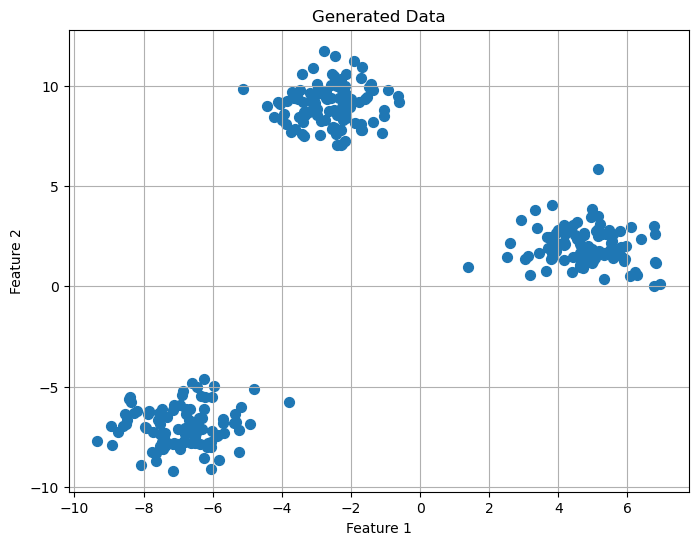

In [1]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
# Step 2: Generate sample data
# Let's generate some random data for demonstration purposes
# You can replace this with your own dataset
n_samples = 300
random_state = 42
X, _ = make_blobs(n_samples=n_samples, random_state=random_state)

# Step 3: Visualize the generated data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Generated Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()




## Performing Feature Scaling

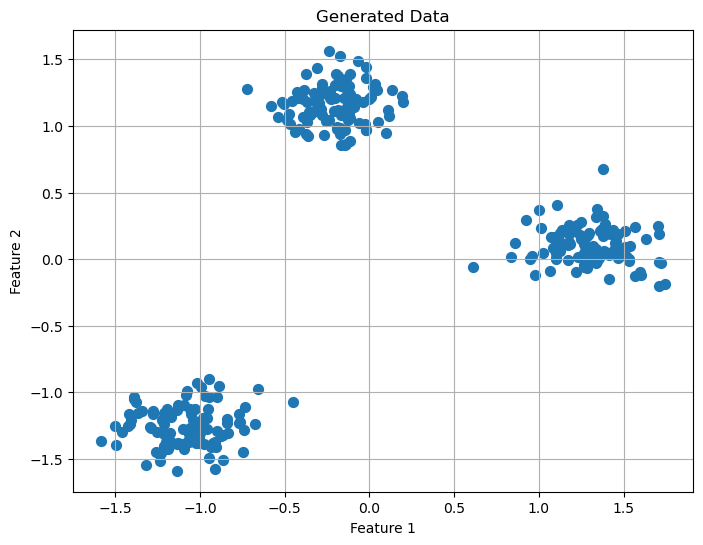

In [2]:
# Step 4: Feature Scaling
# Feature scaling is important for K-means clustering to ensure that all features contribute equally to the distance calculations.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Visualize the generated data
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=50)
plt.title('Generated Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

## Performing KMean Clustering with scikit-learn

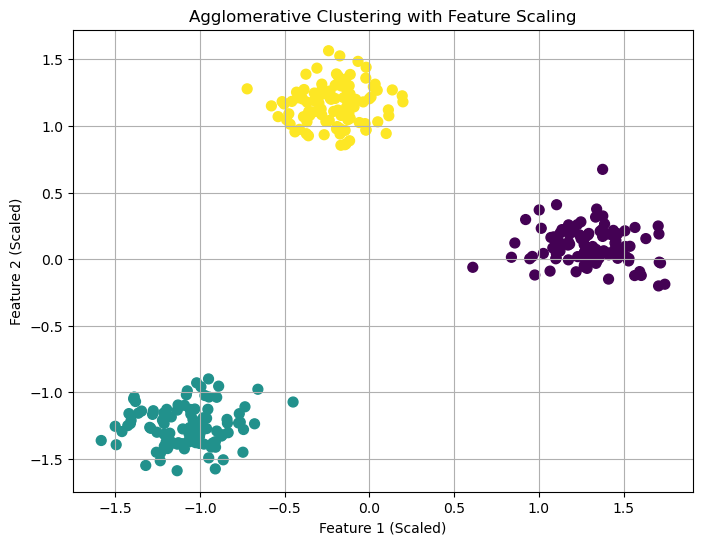

In [3]:
# Step 5: Perform K-means clustering
# Initialize the KMeans model with desired number of clusters
n_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the model to the scaled data
agg_clustering.fit(X_scaled)

# Step 7: Visualize the clustered data
# Get the labels assigned to each data point
labels = agg_clustering.labels_

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, s=50, cmap='viridis')
plt.title('Agglomerative Clustering with Feature Scaling')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.grid(True)
plt.show()



## Dendrogram Visualization

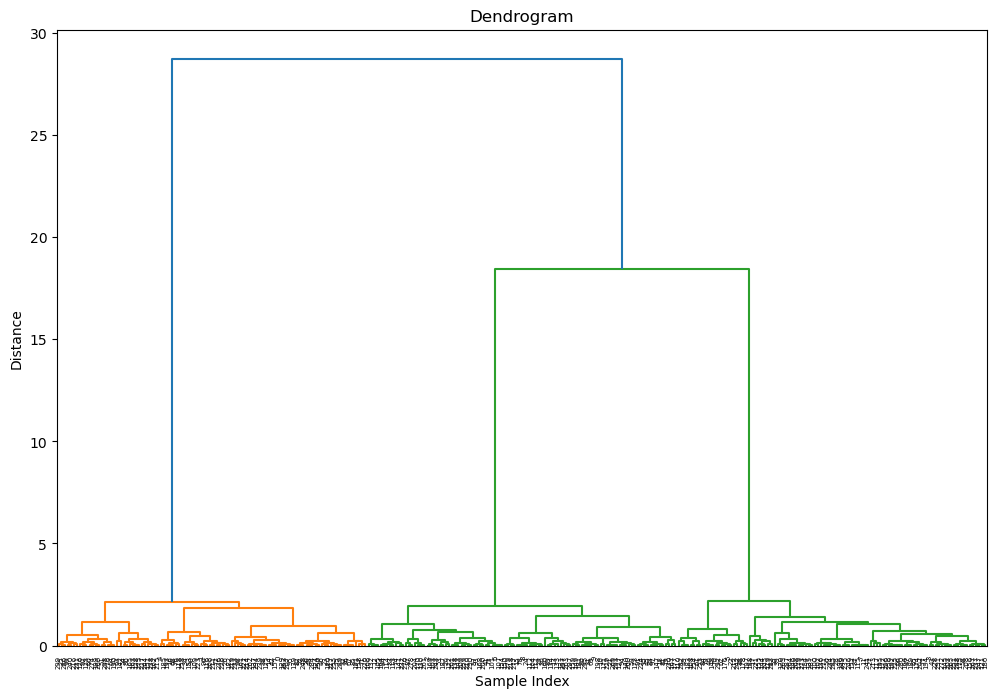

In [4]:
# Step 6: Visualize the dendrogram
# Generate the linkage matrix
linkage_matrix = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

### Silhouette Score

In [7]:
# Silhouette score
from sklearn.metrics import silhouette_score


silhouettes = []
for i in range(2, 10):  # trying different number of clusters from 1 to 10
    agg_clustering = AgglomerativeClustering(n_clusters=i)

    # Fit the model to the scaled data
    agg_clustering.fit(X_scaled)

    # Step 7: Visualize the clustered data
    # Get the labels assigned to each data point
    labels = agg_clustering.labels_
    agg_clustering.fit(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, agg_clustering.labels_)
    silhouettes.append(silhouette_avg)
    #wcss.append(kmeans.inertia_)

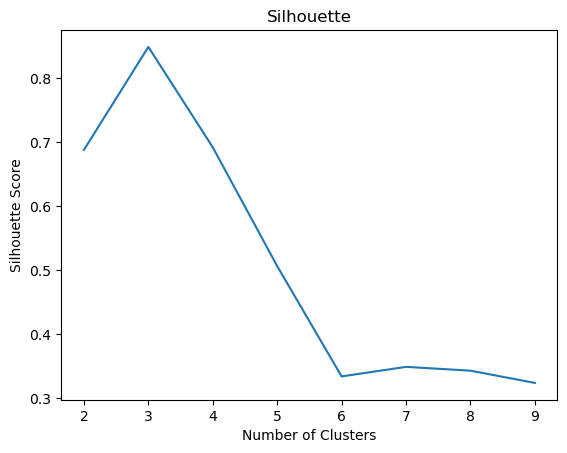

In [8]:
plt.plot(range(2, 10), silhouettes)
plt.title('Silhouette')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()